In [1]:
from spectral import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from sklearn.cluster import KMeans, MeanShift
import pandas as pd

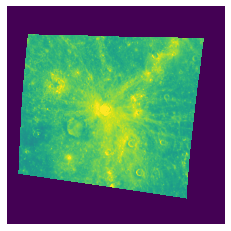

In [2]:
img = open_image('dominici_11bands.hdr')
arr = img.load()
im=arr[:,:,3]
#print(img)
#print(img.shape)
plt.imshow(im, vmin=0.001, vmax=0.1)
#print(im.min())
plt.axis("off")
plt.show()

In [3]:
im1=arr[560:675,540:650,:]/arr[560:675,540:650,2]
print(im1.shape)

(115, 110, 11)


In [4]:
X1=im1.reshape(-1,im1.shape[2])
k_means=KMeans(n_clusters=10)
_ = k_means.fit(X1)
X_clustered = k_means.labels_
#X_clustered = X_clustered.reshape(D.shape)
print(im1.shape)
print(X1.shape)

(115, 110, 11)
(12650, 11)


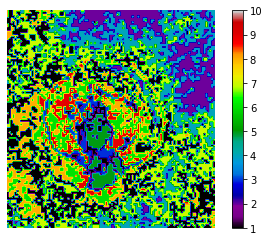

In [5]:
plt.imshow(X_clustered.reshape(115,110),cmap='nipy_spectral')
ticks = [*range(1,11)]
cb = plt.colorbar(ticks=ticks)
cb = plt.clim(1,10)
#plt.colorbar(ticks=range(1,9), label='digit value')
plt.axis("off")
plt.show()


In [6]:
#plt.plot(X_clustered)
a=k_means.cluster_centers_
b=k_means.labels_
print(b)
print(b.shape)
#c=b.reshape(im1.shape)
#print(c.shape)
#plt.legend(b)
#plt.imshow(c[:,:,3])
print()

[8 0 0 ... 0 8 8]
(12650,)



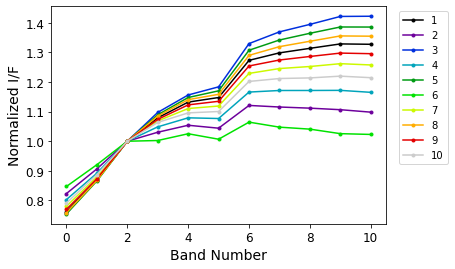

In [7]:
colors = pl.cm.nipy_spectral(np.linspace(0,1,10))
for i in range(a.shape[0]):
    plt.plot(a[i],c=colors[i],label=i+1,marker='.')
    plt.legend(bbox_to_anchor=(1.2, 1.0))
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Normalized I/F', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    